In [296]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb


In [297]:
df = pd.read_csv("dataset_1.csv", encoding = "ISO-8859-1", nrows=1039, sep=';')
print(df)

                                   mensaje  pregunta  afirmacion  negacion  \
0                     de donde es tu madre         1           0         0   
1                         de donde eres tu         1           0         0   
2                            de donde eres         1           0         0   
3             0 mermelada con infinito pan         0           0         0   
4                             a despedirse         0           0         0   
5                                   pegale         0           0         0   
6                pero que no estan jugando         0           0         1   
7                            pero me dolio         0           0         0   
8                          pero me quieres         1           0         0   
9                          no se si vengas         0           0         0   
10              por las cosas que me pasan         0           0         0   
11                                 1 amiga         0           0

In [298]:
df_toxic = df.drop(['mensaje'], axis=1)
counts = []
categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['categoria', 'numero_mensajes'])
df_stats

,categoria,numero_mensajes
0,pregunta,334
1,afirmacion,21
2,negacion,23
3,estado_persona,90
4,felicitacion,7
5,agradecimiento,5
6,opinion,90
7,saludo,35
8,otra_persona,68
9,transporte,30


Text(0.5,0,'Categoría')

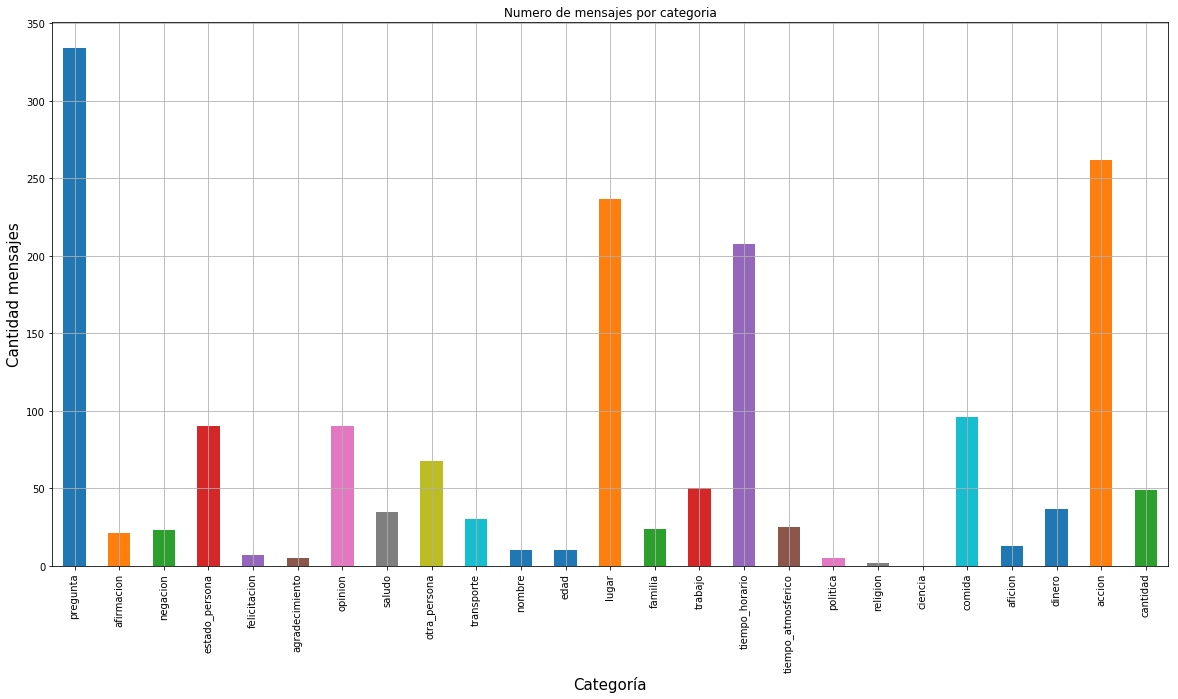

In [299]:
df_stats.plot(x='categoria', y='numero_mensajes', kind='bar', legend=False, grid=True, figsize=(20, 10))
plt.title("Numero de mensajes por categoria")
plt.ylabel('Cantidad mensajes', fontsize=15)
plt.xlabel('Categoría', fontsize=15)

Text(0.5,0,'Categorías')

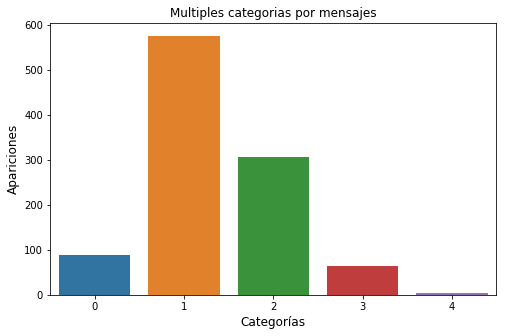

In [300]:
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiples categorias por mensajes")
plt.ylabel('Apariciones', fontsize=12)
plt.xlabel('Categorías', fontsize=12)

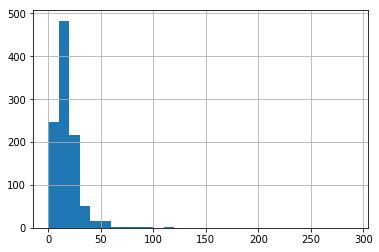

In [301]:
lens = df.mensaje.str.len()
lens.hist(bins = np.arange(0,300,10))

In [302]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot_wordcloud(texto):
    wc = WordCloud(background_color='black',max_font_size=50).generate(texto)
    plt.figure(figsize=(16,12))
    plt.imshow(wc,interpolation='bilinear')
    
import nltk
from nltk.tokenize import ToktokTokenizer
def plot_frecuencias(texto):
    token=ToktokTokenizer()
    freqdist = nltk.FreqDist(token.tokenize(texto))
    freqdist
    plt.figure(figsize=(16,5))
    freqdist.plot(20)

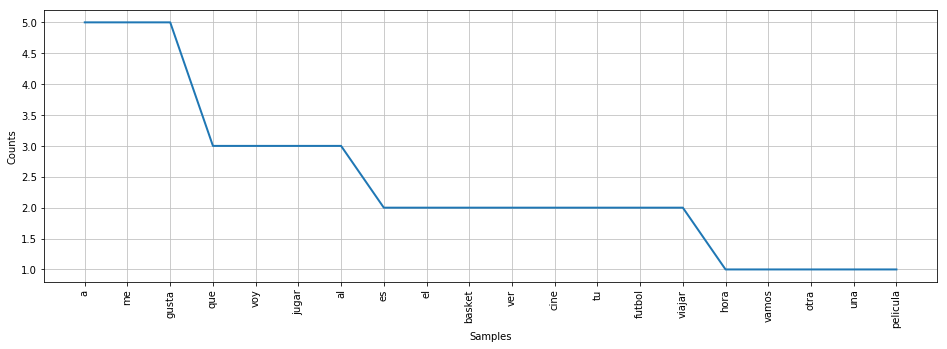

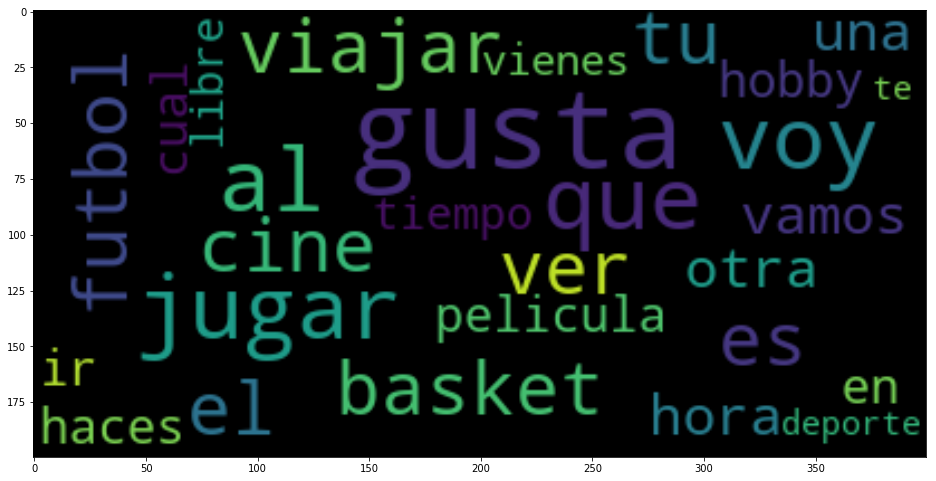

In [303]:
subset = df[df.aficion==1]
text =' '.join(subset['mensaje'])
plot_frecuencias(text)
plot_wordcloud(text)

In [304]:
train, test = train_test_split(df, random_state=42, test_size=0.0001, shuffle=True)

In [305]:
X_train = train.mensaje
X_test = test.mensaje
print(X_train.shape)
print(X_test.shape)

(1038,)
(1,)


In [306]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])



SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

xgboost_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(XGBClassifier(solver='sag'), n_jobs=1)),
            ])

KNeighbor_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=2), n_jobs=1)),
            ])

multiLayerPerceptron_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MLPClassifier(solver='sgd'), n_jobs=1)),
            ])

decissionTree_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(DecisionTreeClassifier(), n_jobs=1)),
            ])



modelo = SVC_pipeline

In [307]:
valores = []
for category in categories:
    #print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    modelo.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = modelo.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    if(accuracy_score(test[category], prediction) == 1.0):
        continue
    valores.append(accuracy_score(test[category], prediction))
print('Ok')
media = sum(valores)/len(valores)
print ("media: "+str(media))

Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Test accuracy is 1.0
Ok


ZeroDivisionError: division by zero

In [308]:
import pymongo
from pymongo import MongoClient
client = MongoClient('localhost',27017)
db=client.test_database
db.mensaje_collection.remove()
collection = db.mensaje_collection
collection.insert_many(df.to_dict('records'))
client.close()

In [309]:
def get_objeto_busqueda_de_prediccion(prediccion):
    condiciones = []
    es_pregunta = False
    if 'pregunta' in prediccion:
        es_pregunta = True
        
    if 'felicitacion' in prediccion:
        condiciones.append({"agradecimiento":1})

    if 'lugar' in prediccion:
        condiciones.append({"lugar":1})
        
    if 'saludo' in prediccion:
        condiciones.append({"saludo":1})
        
    if 'estado_persona' in prediccion:
        condiciones.append({"estado_persona":1})
        
    if 'nombre' in prediccion:
        condiciones.append({"nombre":1})
        
    if 'comida' in prediccion:
        condiciones.append({"comida":1})
        
    if 'opinion' in prediccion:
        condiciones.append({"opinion":1})
        
    if 'accion' in prediccion:
        condiciones.append({"accion":1})
        
    if 'otra_persona' in prediccion:
        condiciones.append({"otra_persona":1})
    
    if 'familia' in prediccion:
        condiciones.append({"familia":1})
    
    if 'transporte' in prediccion:
        condiciones.append({"transporte":1})
    
    return condiciones,es_pregunta

In [310]:
def get_condicion(prediccion):
    condiciones = []
    for pred in prediccion:
        if pred=='pregunta':
            condiciones.append({"pregunta":0})
        if pred=='felicitacion':
            condiciones.append({"agradecimiento":1})
        else:
            condiciones.append({pred:1})
    return condiciones

In [311]:
import random

def chat(mensaje):
    prediccion = []
    for category in categories:
        modelo.fit(X_train, train[category])
        if modelo.predict([mensaje]) == [1]:
            prediccion.append(category)
    return prediccion

In [312]:
import time
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
chat("que piensas de mi")
chat("hola que tal estas")
chat("quieres ir al campo")
chat("que vas a querer de cenar")
chat("quieres venir en mi coche")

chat("eres divertido")
chat("no me encuentro bien")
chat("podemos ir en mi coche")
chat("tortilla de patata sin cebolla por favor")
chat("voy a ir en bus con mi madre")
chat("hace frio en tu pueblo")

['lugar', 'tiempo_atmosferico']

In [313]:
import random

def score(condiciones,respuestas):
    for respuesta in respuestas:
        score = 0
        for condicion in condiciones:
            if respuesta[list(condicion)[0]] == condicion[list(condicion)[0]]:
                score+=1
        respuesta['score']=score
        
def max_score(respuestas):
    maximo = 0
    for respuesta in respuestas:
        if respuesta['score']> maximo:
            maximo = respuesta['score']
    return maximo

def get_random_scored(maximo, respuestas):
    resultado = []
    for respuesta in respuestas:
        if respuesta['score']== maximo:
            resultado.append(respuesta)
    return random.choice(resultado)

In [332]:
from timeit import default_timer as timer
def predecir_respuesta(mensaje):
    start = timer()
    condiciones = get_condicion(chat(mensaje))
    end = timer()
    print(str(end - start)+ " segundos en predicción") 
    respuestas = []

    start = timer()

    respuestas = []
    respuestas = [x for x in collection.find({"$or":condiciones})]

    score(condiciones,respuestas)

    print(mensaje+ " -> "+get_random_scored(max_score(respuestas),respuestas)['mensaje'])
    end = timer()
    print(str(end - start)+ " segundos en búsqueda\n") 

In [333]:
predecir_respuesta("hola que tal")
predecir_respuesta("hace frio")
predecir_respuesta("vienes en mi coche")
predecir_respuesta("que tal esta tu madre")
predecir_respuesta("que quieres para cenar")
predecir_respuesta("vas a salir esta noche")
predecir_respuesta("que opinas de rajoy")
predecir_respuesta("mañana vamos a arnedo")
predecir_respuesta("cuanto cuesta tu movil")


0.31248200263794956 segundos en predicción
hola que tal -> hola como estas
0.014460348915719123 segundos en búsqueda

0.32841879502274196 segundos en predicción
hace frio -> habia mucha niebla en la carretera
0.0018963574805468397 segundos en búsqueda

0.32091986973281905 segundos en predicción
vienes en mi coche -> estoen la estacion de tren
0.01456180858608036 segundos en búsqueda

0.32416804536478594 segundos en predicción
que tal esta tu madre -> que tal los abuelos
0.015292259565512722 segundos en búsqueda

0.32823171042821286 segundos en predicción
que quieres para cenar -> voy a hacer tortilla de patata
0.014228399206842823 segundos en búsqueda

0.3144771806644826 segundos en predicción
vas a salir esta noche -> a trabajar luego
0.004034634695329942 segundos en búsqueda

0.3112732836747796 segundos en predicción
que opinas de rajoy -> que mal canta el que esta en la orquesta de la ruleta
0.013625212669438724 segundos en búsqueda

0.3069920374685182 segundos en predicción
mañana 